<a href="https://colab.research.google.com/github/qrvgapostol/CPE032_PrelimExam_Apostol/blob/main/Apostol_PrelimExamFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2025-2026
<hr> | <hr>
<u>**Prelim Exam**</u> | <u>**Prelim Exam Progess Report**</u>
**Name** | Apostol, Ruud Van
**Section** | CPE31S2
**Date Performed**: | 09/02/25
**Date Submitted**: | 09/02/25
**Instructor**: | Engr. Jimlord Quejado

<hr>

### **1.Abstarcting a video stream with mangers.CaptureManger and Abstracting a windw and keyboard with managers.WindowManger**

In [ ]:
#Create a file called managers.py
#This file should contain the code below:
import cv2
import numpy
import time

class CaptureManager(object):
    def __init__(self, capture, previewWindowManager = None, shouldMirrorPreview = False):
        self.previewWindowManager = previewWindowManager
        self.shouldMirrorPreview = shouldMirrorPreview

        self._capture = capture
        self._channel = 0
        self._enteredFrame = False
        self._frame = None
        self._imageFilename = None
        self._videoFilename = None
        self._videoEncoding = None
        self._videoWriter = None
        self._startTime = None
        self._framesElapsed = long(0)
        self._fpdEstimate = None

    @property
    def channel(self):
        return self._channel

    @channel.setter
    def channel(self, value):
        if self._channel != value:
           self._channel = value
           self._frame = None

    @property
    def frame(self):
        if self._enteredFrame and self._frame is None:
             _, self._frame = self._capture.retrieve()
        return self._frame

    @property
    def isWritingImage(self):
        return self._imageFilename is not None

    @property
    def isWritingVideo(self):
        return self._videoFilename is not None

#2.Add the following dunctions to your maagers.py
def enterFrame(self):
    """Capture the nextvfame, if any."""

    # First, we will check if any previous fram was exited.
    assert not self._enteredFrame, \

    if self._capture is not None:
        self._enteredFrame = self._capture.grab()

def exitFrame(self):
    """Draw to the window. Write to files. Release the frame."""

    #Check whether any grabbed frame is retrievable
    #The getter may retrieve and cache the frame.
    if self.frame is None:
        self._enteredFrame = False
        return

    #Update the FPS estimate and related variables.
    if self._framesElapsed == 0:
        self._startTime = time.time()
    else:
        timeElapsed = time.time() - self._startTime
        self._fpsEstimate = self._framesElapsed / timeElapsed
    self._framesElapsed += 1

    #Draw to the window, if any.
    if self.previewWindowManger is not None:
        if self.shouldMirrorPreview:
            mirroredFrame = numpy.fliplr(self._frame).copy()
            self.previewWindowManager.show(mirroredFrame)
        else:
            self.previewWindowManager.show(self._frame)

    #Write to the image file, if any.
    if self.isWritingImage:
        cv2.imwrite(self._imageFilename, self._frame)
        self._imageFilename = None

    #Write to the video file, if any.
    self._writeVideoFrame()

    #Release the frame.
    self._frane = None
    self._enteredFrame = False

#3.
def writeImage(self, filename):
    """Write the next exited frame to an image file."""
    self._imageFilename = filename

def startWritingVideo(
    self, filename,
    encoding = cv2.VideoWriter_fourcc('I', '4', '2', '0')):
    """Start writing exited frames to a video file."""
    self._videoFilename = filename
    self._videoEncoding = encoding

def stopWritingVideo (self):
    """Stop writing exited frames to a video file."""
    self._videoFilename = None
    self._videoEncoding = None
    self._videoWroter = None

def _writeVideoFrame(self):
    if not self.isWritingVideo:
        return

    if self._videoWriter is None:
        fps = self._capture.get(cv2.CAP_PROP_FPS)
        if fps == 0.0:

            #The capture's FPS is unkwown so use an estimate.
            if self._framesElapsed < 20:

              #Wait until more frames elapse so the
              #estimate is more stable
                return
            else:
                fps = self._fpsEstimate

        size = (int(self._capture.get(cv2._CAP_FRAME_WIDTH)),
                int(self._capture.get(cv2._CAP_FRAME_HEIGHT)))

        self._videoWriter = cv2.VideoWriter(self._VideoFilename,
                                            self._videoEncoding,
                                            fps, size)
    self._videoWriter.write(self._frame)

#2.Abstracting a window and keyboard with managers.WindowManger
class WindowManager(object):
    def __init__(self, windowName, keypressCallback = None):
        self.keypressCallback = keypressCallback
        self._windowName = windowName
        self._isWindowCreated = False

    @property
    def isWindowCreated(self):
        return self._isWindowCreated

    def createdWindow (self):
        cv2.namedWindow(self._windowName)
        self._isWindowCreated = True

    def show(self, frame):
        cv2.imshow(self._windowName, frame)

    def destroyWindow (self):
        cv2.destroyWindow(self._windowName)
        self._isWindowCreated = False

    def processEvents (self):
        keycode = cv2.waitkey(1)
        if self.keypressCallback is not None and Keycode != -1:
        #Discard any non-ASCII info encoded by GTK
            keycode &= 0xFF
            self.keypressCallback(keycode)

### **3.Applying everyting with cameo.Cameo**

In [ ]:
import cv2
from managers import WindowManager, CaptureManager

class Cameo(object):
    def __init__(self):
        self._windowManager = WindowManager('Cameo',
        self.onKeypress)
        self._captureManager = CaptureManager(
        cv2.VideoCapture(0), self._windowManager, True)

    def run(self):
        self._windowManager.createWindow()
        while self._windowManager.isWindowCreated:
            self._captureManager.enterFrame()
            frame = self._captureManager.frame

            self._captureManager.exitFrame()
            self._windowManager.processEvents()

    def onKeypress (self, keycode):

        if keycode == 32: #space
            self._captureManager.writeImage('screenshot.png')
        elif keycode == 9: #tab
            if not self._captureManager.isWritingVideo:
                self._captureManager.startWritingVideo(
                'secreencast.avi')
            else:
                self._captureManager.stopWrtingVideo()
        elif keycode == 27: #escape
            self._windowManager.destroyWindow()

if __name__=="__main__":
    Cameo().run()

### **1. Provide an analysis**

**Is it necessary to use object oriented approach in creating the application interface for our project?**
- Yes, because, using an object ioriented approach in creating application interface for projects is highly beneficial. OOP principles such as encapsulation, inheritance, and polymorphism help in creating user-friendly gui that improve productivity.

**Why are certain attributes of the class defined with underscore in the name? What does this do?**
- It can serve as a placeholder in loops, ignore specific values when unpacking, store the result of the last evaluated expression in the interactive shell, and indicate that a variable is intended for internal use within a class or module.

**Explain the use of @property and other similarly confusing part of this code.**
- It allows you to define methods in a class that can be accessed like attributes. It is commonly used to implement getters, setters, and deleters in a clean and Pythonic way, without explicitly calling methods.

**What are these additional functions' intended functions? Provide a quick discussion on how they work by analyzing the parameters passed to the function.**
- Provide an analysis:

What are these additional functions’ intended functions? Provide a quick discussion on how they work by analyzing the parameters passed to the functions
The additional functions added are to handle frame captures, frame processing, and writing images/videos to files.

enterFrame():
Responsible to capture next frame if available.
Parameters:
No parameters are being passed here
Assert checks for internal consistency

exitFrame():
This function processes and handles the captured frame. It then writes the fram to the output and then releases the frame
Parameters:
No parameters are passed here
self.previewWindowManager.show() and self._writeVideoFrame() are external functions for displaying the frame and writing it to a video file

writeImage(filename):
Sets the filename where the next frame will be saved as an image. Image is then stored in self._imageFilename, then frame will be written to this file when exitFrame() called
Parameters:
filename: string representing the file path where the image will be saved

startWritingVideo(filename, encoding):
Initializes the process of writing frames to video file. It stores the filename (self._videoFilename) and encoding method (self._videoEncoding) that will be used to write the video.
Parameters:
filename: path to the output video file where frames will be written
Encoding: video codec for writing

stopWritingVideo():
Function to stop the process of writing frames to video file.
Parameters:
No parameters are needed

_writeVideoFrame():
An internal method that writes the current frame to the video file
Parameters:
No parameters are passed here




### **2.Provide an analysis**
**What are the identifiable drawbacks for this implementation?**
- Window creation conflicts
If createWindow() is called multiple times it will keep recreating the window with cv2.namedWindow(self._windowName), but there’s no check to avoid this.
- No window destruction check
destroyWindow only updates the _isWindowCreated flag when the window is destroyed, but there is no check for whether the window exists or not before attempting to destroy it
- No window timeout or exit conditions
There’s is not explicit check to handle timeouts or exit conditions based on keypresses
- Lack of error handling
The code has no error handling for scenarios where cv2.namedWindow or cv2.imshow fails


**Based on those idententified drawbacks, what solutions can you implement to solve them?**
-  Window creation conflicts
Before calling cv2.namedWindow(self._windowName), check if the window is already been created using isWindowCreated
- No window destruction check
Before calling cv2. destroyWindow(self._windowName), check if the window exists to avoid errors
- No window timeout or exit conditions
Add a timeout or condition to close the window after a certain period or when a key is pressed
- Lack of error handling
Use try-except blocks around OpenCV functions like cv2.namedWindow or cv2.imshow to handle failures and avoid crashes


### **4.Implementation**
Your task to very implementation:

**Run the application; make sure you now have a live camera feed. (Show screenshot)**
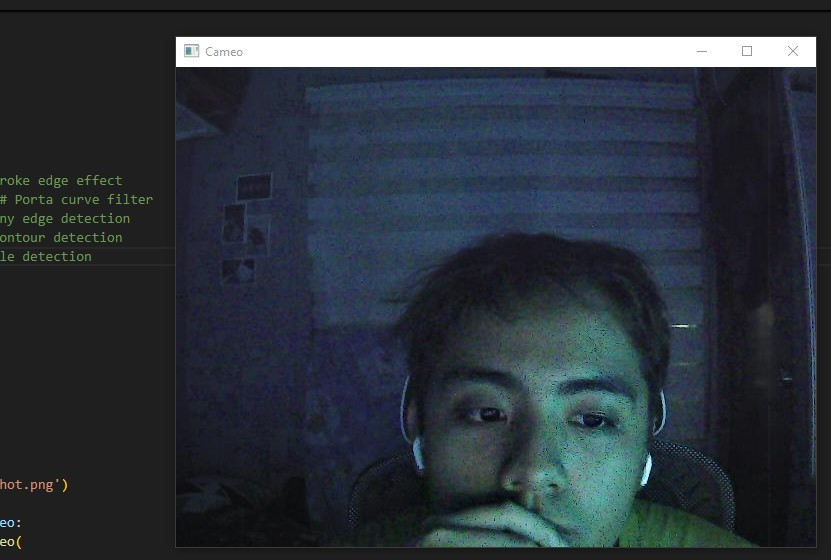

**What happens when you take a screenshot?**
- Pressing spacebar saves a frame (or screenshot) to the director

**Change shouldMirrorPreview in the initialization of the CaptureManager class to false, take a screenshot again and show what happended (Show screenshot).**
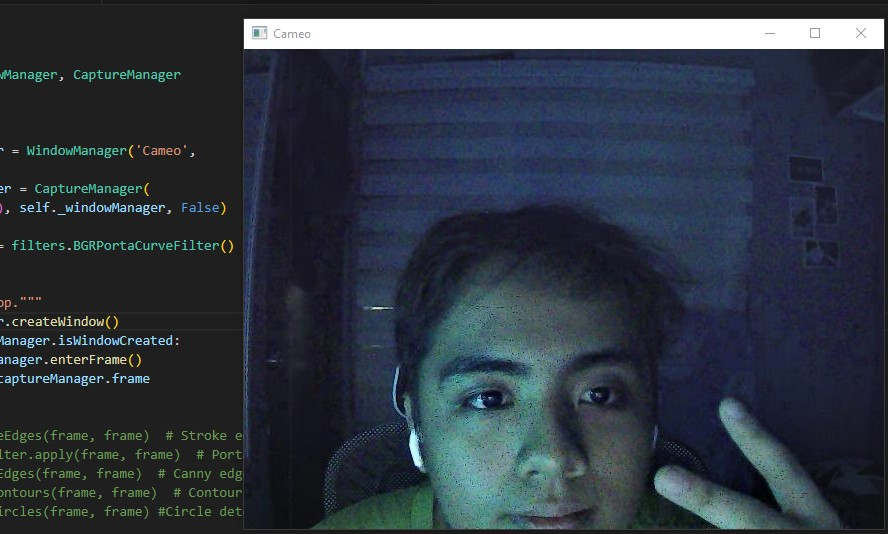
- Changing the line in cv2.VideoCapture(0), self._windowManager, False) to either false or true mirrors the camera

## **Supplementary Activity**
This supplementary activity assumes that you have fully complied the previous activities for image processing (including all functions created in the previous module that was tested on GrumpyCat --and eventually your own images.)

**Part 1:Modify your cameo.py such that the following commented lines should appear in your own code.**

In [ ]:
import cv2
from managers import WindowManager, CaptureManager

class Cameo(object):
    def __init__(self):
        self._windowManager = WindowManager('Cameo',
        self.onKeypress)
        self._captureManager = CaptureManager(
        cv2.VideoCapture(0), self._windowManager, True)

    def run(self):
        self._windowManager.createWindow()
        while self._windowManager.isWindowCreated:
            self._captureManager.enterFrame()
            frame = self._captureManager.frame

            self._captureManager.exitFrame()
            self._windowManager.processEvents()

    #The rest should remain the same.

Detail the necessary steps taken to apply all the filters previously created to the live video feed captures for the supplementary activity. Show screenshot for each.

## **Part 2: Implement cannt edge detection and contour detection to live video feed. Make sure that the necessary function/packages/modules are used. Provide an extensive analysis of your output supported by screenshots.**

- Detail the necessary steps taken to apply all the filters previously created to the live video feed captured for the supplementary activity. Show screenshot of each
- **Clean feed**
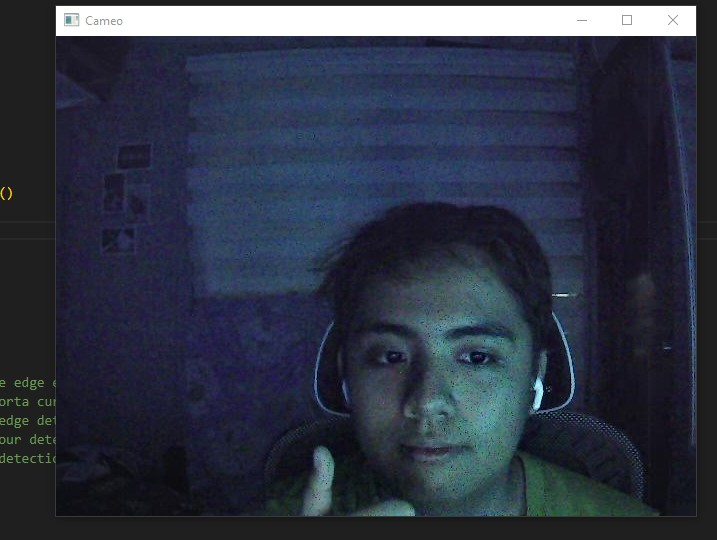

**Stroke edges**
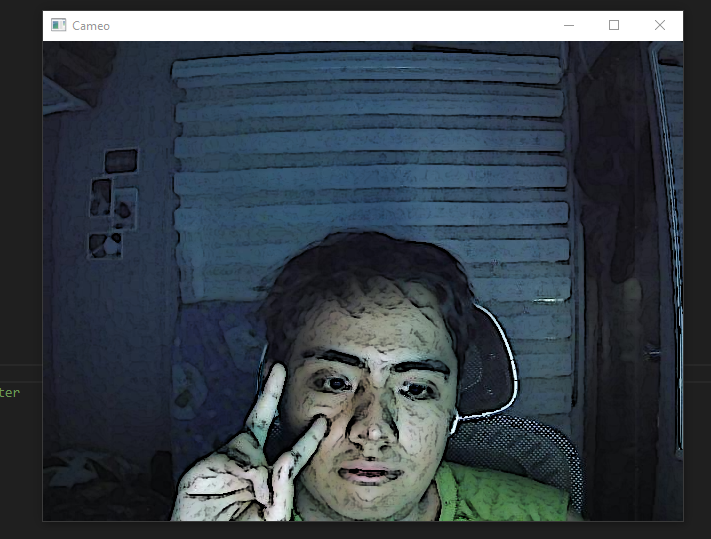

**Curve filter**
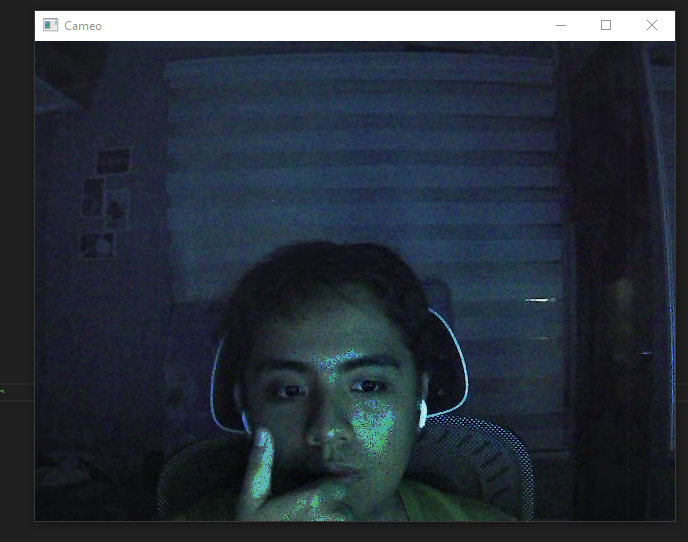

**Stroke edges + curve filter**
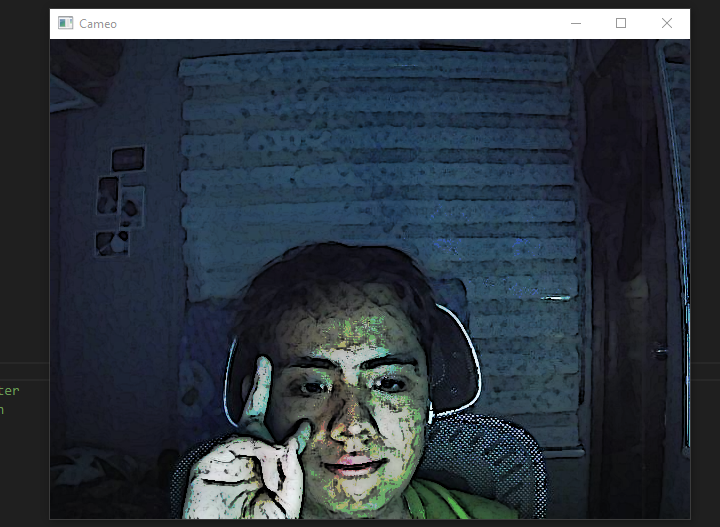

**Step by step process on how filters.py was made
After adding the commented lines in cameo.py, first is we build the filters logic to fulfill the requirements
filters.py**



In [ ]:
import cv2
import numpy as np

#StrokeEdge
def strokeEdges(src, dst, blurKsize = 7, edgesKsize = 5):
    if blurKsize >= 3:
        blurredSrc = cv2.medianBlur(src, blurKsize)
        graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
    else:
        graySrc = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize = edgesKsize)
    normalizedInverseAlpha = (1.0/255) * (255 - graySrc)

    channels = cv2.split(src)
    for channel in channels:
        channel[:] = channel * normalizedInverseAlpha
    cv2.merge(channels, dst)
class VFuncFilter(object):
    def __init__(self, vFunc=None, dtype=np.uint8):
        self._vFunc = vFunc
        self._dtype = dtype

    def apply(self, src, dst):
        srcFlatView = src.reshape((-1, src.shape[2]))
        dstFlatView = dst.reshape((-1, dst.shape[2]))
        dstFlatView[:] = self._vFunc(srcFlatView).astype(self._dtype)

First, we define our strokeEdges function
- **def strokeEdges(src, dst, blurKsize = 7, edgesKsize = 5):**
- Note: blurKsize denotes the kernel size for blurring and edgesKsize for edge detection


In [ ]:
#Blurring for noise reduction logic
    if blurKsize >= 3:
        blurredSrc = cv2.medianBlur(src, blurKsize)
        graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
    else:
        graySrc = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#Median blur is applied if blurKsize is 3 or higher
#Grayscaling also included for edge detection


In [ ]:
#Edge detection and edge highlighting
    cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize = edgesKsize)
    normalizedInverseAlpha = (1.0/255) * (255 - graySrc)
#Laplacian operator is used for edge detection
#This also converts the grayscale to inverse alpha for edges to be lighter and non-edges be darker


In [ ]:
#Applying the mask to each color channel
    channels = cv2.split(src)
    for channel in channels:
        channel[:] = channel * normalizedInverseAlpha
    cv2.merge(channels, dst)
#Split the image to RGB channels
#Multiply the channels by inverse alpha to reduce brightness
#Merge channels back


In [ ]:
#Base filter class
class VFuncFilter(object):
    def __init__(self, vFunc=None, dtype=np.uint8):
        self._vFunc = vFunc
        self._dtype = dtype


    def apply(self, src, dst):
        srcFlatView = src.reshape((-1, src.shape[2]))
        dstFlatView = dst.reshape((-1, dst.shape[2]))
        dstFlatView[:] = self._vFunc(srcFlatView).astype(self._dtype)
#Mostly done for easier mathematical transformations
#Note the FlatView, which literally flattens a 3d image display to 2d


In [ ]:
#Curve-base filter
class BGRPortaCurveFilter(VFuncFilter):
    def __init__(self, dtype=np.uint8):
        def curve(v):
            v = np.clip(v, 0, 255)
            return np.where(v < 128,
                            v * 0.9,
                            255 - (255 - v) * 0.7)
        super().__init__(curve, dtype)
#Pixel value check in np.clip(v, 0, 255) to ensure pixel values 0-255
#np.where(v < 128, v * 0.9, 255 - (255 - v) * 0.7) for brightening/darkening pixels


In [ ]:
# Canny Edge Detect
def cannyEdges(src, dst, lowThreshold=100, highThreshold=200):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, lowThreshold, highThreshold)
    dst[:] = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
#Grayscale image first for better image processing (via cvtColor)
#Apply the canny function for edge detection
#Copy image frame to video buffer


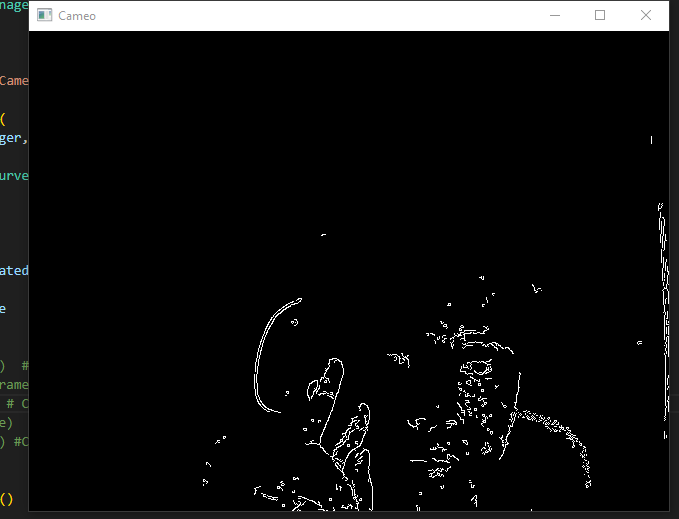

In [ ]:
# Contour Detect
def findContours(src, dst):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    dst[:] = src.copy()


    for c in contours:
        # Find the bounding box coordinates
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(dst, (x, y), (x + w, y + h), (0, 255, 0), 2)


        # Find minimum area
        rect = cv2.minAreaRect(c)


        # Calculate coordinates of the minimum area rectangle
        box = cv2.boxPoints(rect)


        # Normalize coordinates to integers
        box = np.int64(box)


        # Draw contours
        cv2.drawContours(dst, [box], 0, (0, 0, 255), 2)


        # Calculate center and radius of minimum enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(c)


        # Cast to integers
        center = (int(x), int(y))
        radius = int(radius)


        # Draw the circle
        cv2.circle(dst, center, radius, (255, 0, 0), 2)


    # Draw all contours thin
    cv2.drawContours(dst, contours, -1, (255, 255, 0), 1)
#Gray keyword in top to grayscale image
#Threshold turns grayscale into black and white
#THRESH_BINARY + OTSU automatically chooses the cutoff
#The for c in contours is used for drawing multiple geographic approximations


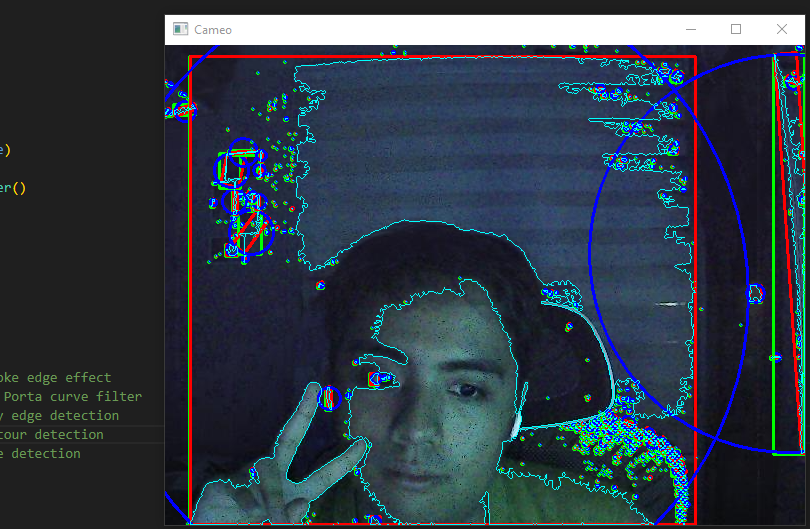

### **Part 3: Implement circle detection to your code. What should happen bow is that whenever a flat circular object is held up to your camera, it should draw the circle on the image where the object is found. Show screenshots to support this outcome.**

In [ ]:
#CircleDetect
def findCircles(src, dst, blur_ksize=15, dp=1, minDist=30,
                param1=100, param2=40, minRadius=0, maxRadius=0):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_ksize)


    # Detect circles
    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp,
        minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # draw the outer circle
            cv2.circle(dst, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # draw the center of the circle
            cv2.circle(dst, (i[0], i[1]), 2, (0, 0, 255), 3)

In [ ]:
def findCircles(src, dst, blur_ksize=15, dp=1, minDist=30,
                param1=100, param2=40, minRadius=0, maxRadius=0):
#First, define values


In [ ]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_ksize)
#Functions to grayscale then add blue, for better circle detection

    # Detect circles
    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp,
        minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )
#Main houghcircle function to detect the circles
#Note the variables
#Dp is inverse ratio of resolution, basically just how pixelated the image becomes, 1 means normal resolution (same as input), 2 halves resolution
#minDist for in-between circle spacing to prevent multiple detection of same circles and avoid overalapping
#Param1 is upper threshold for internal canny edge detection
#Param2 is the circle detection itself, lower values increase the number of circles detected, the higher the number, the more a circle has to be well defined to be detected
#Minradius and mindist are to restrict circle sizes, mostly to reduce false positives

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # draw the outer circle
            cv2.circle(dst, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # draw the center of the circle
            cv2.circle(dst, (i[0], i[1]), 2, (0, 0, 255), 3)
#To draw the circles to the image


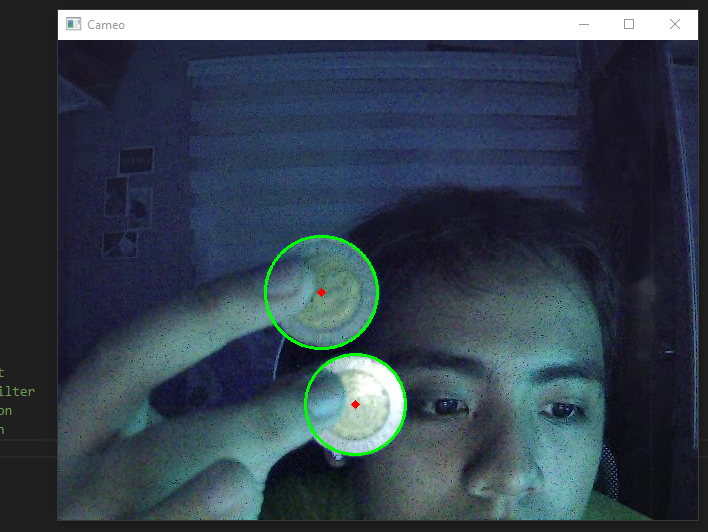

### Summary, Lesson Learned, Conclusion**
**Summary**

In this Prelim Exam, we developed a single program that abstracts both video capture and keyboard interaction using OpenCV. The system initializes a webcam feed, applies filters or image processing techniques (blurring, grayscale, portrait curve, edge detection, circle detection), and responds to keyboard inputs in real time. Specific keys were mapped to functions such as taking a screenshot, starting or stopping video recording, toggling filters, and applying computer vision overlays. By consolidating the video management and keyboard event handling into one VideoApp class, the code became cleaner, modular, and easier to extend.

**Lessons Learned**

Abstraction improves maintainability – separating video logic and keyboard commands into one class with clear responsibilities makes the code easier to manage and expand.

Keyboard-event mapping is essential – designing key controls for specific actions (e.g., screenshots or recording) enables interactive computer vision applications.

Filters and overlays demonstrate real-time processing – applying effects like Gaussian blur, grayscale, Canny edges, and Hough circles helps understand how image processing can be dynamically controlled by the user.

Performance considerations – real-time processing requires efficient handling of frames, especially when combining multiple filters and recording simultaneously.

Practical applications – this type of abstraction can be extended to surveillance systems, interactive applications, or user-controlled multimedia tools.

**Conclsuion**

The integration of video abstraction and keyboard handling illustrates the power of combining object-oriented programming with computer vision. Through this project, we created a modular and interactive tool capable of real-time video manipulation, user input handling, and automated recording/screenshot capture. The activity reinforces the importance of abstraction in software design, where combining related functionalities into a single class improves usability, readability, and scalability. Ultimately, this project demonstrates how OpenCV and Python can be used to build flexible, user-driven multimedia applications.